# Survival Analysis :  Quick Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


### Example with a fictitious data

<AxesSubplot:xlabel='timeline'>

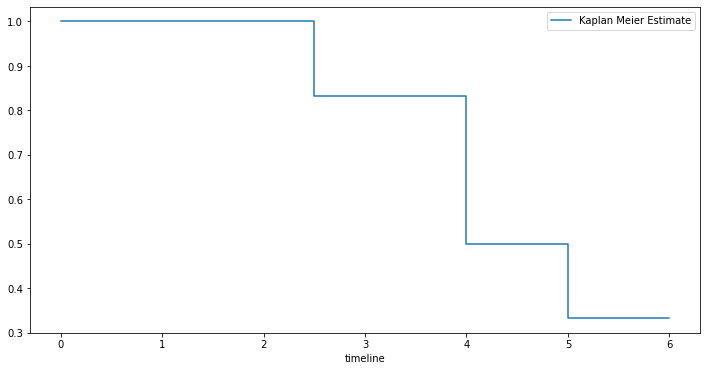

In [2]:
from lifelines import KaplanMeierFitter

## Example Data 
durations = [5,6,6,2.5,4,4]
event_observed = [1, 0, 0, 1, 1, 1]

## create an kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.

## Real World Example 

### We will be using Telco Customer Churn data from Kaggle
https://www.kaggle.com/blastchar/telco-customer-churn/

In [4]:
##  create a dataframe

df = pd.read_csv("Data\write.csv") 

In [6]:
## Have a first look at the data
# df.head() 

In [6]:
## Data Types and Missing Values in Columns
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1152 non-null   int64  
 1   ID                        1152 non-null   object 
 2   age                       1118 non-null   object 
 3   sex                       1119 non-null   object 
 4   city                      1079 non-null   object 
 5   province                  993 non-null    object 
 6   country                   1150 non-null   object 
 7   latitude                  1152 non-null   float64
 8   longitude                 1152 non-null   float64
 9   geo_resolution            1152 non-null   object 
 10  date_onset_symptoms       763 non-null    object 
 11  date_admission_hospital   186 non-null    object 
 12  date_confirmation         1152 non-null   object 
 13  symptoms                  156 non-null    object 
 14  lives_in

In [69]:
filtered = df[['date_confirmation','date_death_or_discharge','outcome','age']].dropna()
# filtered

In [70]:
filtered["outcome"].value_counts()

died                        802
discharge                   149
discharged                   64
recovered                    53
death                        39
dead                          3
released from quarantine      2
Discharged                    2
Deceased                      1
Dead                          1
Died                          1
Death                         1
Name: outcome, dtype: int64

In [71]:
filtered['outcome']=filtered['outcome'].apply(lambda x: 1 if x == 'died' or x == 'death' or  x == 'dead' or x == 'Deceased' or x == 'Died' or x == 'Death' or x == 'Dead'else 0 )

In [72]:
filtered["outcome"].value_counts()

1    848
0    270
Name: outcome, dtype: int64

In [73]:
d,m,y = filtered.loc[1,['date_confirmation']][0].split('.')

In [74]:
from datetime import datetime

In [75]:
int(d)

14

In [76]:
length = len(filtered)
filtered.index = list(range(length))

In [77]:
filtered

,date_confirmation,date_death_or_discharge,outcome,age
0,21.02.2020,22.02.2020,1,78
1,14.02.2020,17.02.2020,0,61
2,14.02.2020,20.02.2020,0,28
3,14.02.2020,02.03.2020,0,56
4,14.02.2020,29.02.2020,0,79
...,...,...,...,...
1113,31.01.2020,19.02.2020,0,20-29
1114,03.03.2020,26.02.2020,1,80-89
1115,01.03.2020,01.03.2020,1,80-89
1116,18.03.2020,19.03.2020,1,80-


In [78]:
from datetime import datetime

days = []
for idx in range(length):
  conf = filtered.loc[idx,['date_confirmation']][0]
  if '-' in conf:
    a,b,c = conf.split(" - ")[0].split('.')
  else:
    a,b,c = conf.split('.')
  dead = filtered.loc[idx,['date_death_or_discharge']][0]
  if '-' in dead:
    x,y,z = dead.split(" - ")[0].split('.')
  else:
    x,y,z = dead.split('.')

  if int(y) > 12:
    t = x
    x=y
    y=t
  if int(b) > 12:
    t = a
    a=b
    b=t

  death = datetime(int(z),int(y),int(x),0,0,0)
  confirm = datetime(int(c),int(b),int(a),0,0,0)
  days.append((death-confirm).days)

In [79]:
filtered["days"] = days

In [80]:
filtered2 = filtered[filtered["days"]<0]
filtered2

,date_confirmation,date_death_or_discharge,outcome,age,days
27,04.03.2020,03.03.2020,1,95,-1
31,24.01.2020,17.01.2020,0,32,-7
47,03.02.2020,02.02.2020,0,38,-1
48,03.02.2020,02.02.2020,0,68,-1
49,03.02.2020,02.02.2020,0,38-68,-1
...,...,...,...,...,...
1110,02.03.2020,01.03.2020,1,70-79,-1
1111,01.03.2020,29.02.2020,1,70-79,-1
1112,03.03.2020,26.02.2020,1,50-59,-6
1114,03.03.2020,26.02.2020,1,80-89,-6


In [81]:
for idx in range(length):
  d = int(filtered.loc[idx,['days']][0])
  if d < 0:
    conf = filtered.loc[idx,['date_confirmation']][0]
    if '-' in conf:
      a,b,c = conf.split(" - ")[0].split('.')
    else:
      a,b,c = conf.split('.')
    dead = filtered.loc[idx,['date_death_or_discharge']][0]
    if '-' in dead:
      x,y,z = dead.split(" - ")[0].split('.')
    else:
      x,y,z = dead.split('.')

    try:
      death = datetime(int(z),int(x),int(y),0,0,0)
      confirm = datetime(int(c),int(a),int(b),0,0,0)
      filtered.loc[idx,['days']] = -(death-confirm).days
    except:
      filtered.loc[idx,['days']] = None
  else:
    pass

In [82]:
## lets have a look at the categories and their distribution in all the categorical columns.

# for i in cat_cols:
#     print('Column Name: ',i)
#     print(df[i].value_counts())
#     print('-----------------------------')

In [83]:
pd.set_option('max_rows', 35)

In [84]:
filtered = filtered.dropna()

In [85]:
length = len(filtered)
filtered.index = list(range(length))

In [86]:
# filtered

In [87]:
# print(filtered[32])

In [88]:
age_group=[]

In [89]:
for idx in range(length):
    age=str(filtered["age"][idx])
    if age=='0-9':
        age_group.append(int(0))
    elif age=='10-19':
        age_group.append(int(1))
    elif age=='20-29':
        age_group.append(int(2))
    elif age=='30-39':
        age_group.append(int(3))
    elif age=='40-49':
        age_group.append(int(4))
    elif age=='50-59':
        age_group.append(int(5))
    elif age=='60-69':
        age_group.append(int(6))
    elif age=='70-79':
        age_group.append(int(7))
    elif age=='80-89':
        age_group.append(int(8))
    elif age=='90-99':
        age_group.append(int(9))
    elif age=='38-68' or age=='0.5' or age=='0.25' or age=='80-':
        age_group.append(None)
    else:
        age_int=int(float(age))//10
        age_group.append(int(age_int))

In [90]:
filtered["age_group"] = age_group
filtered = filtered.dropna()
length = len(filtered)
filtered.index = list(range(length))

In [91]:
filtered

,date_confirmation,date_death_or_discharge,outcome,age,days,age_group
0,21.02.2020,22.02.2020,1,78,1.0,7.0
1,14.02.2020,17.02.2020,0,61,3.0,6.0
2,14.02.2020,20.02.2020,0,28,6.0,2.0
3,14.02.2020,02.03.2020,0,56,17.0,5.0
4,14.02.2020,29.02.2020,0,79,15.0,7.0
...,...,...,...,...,...,...
665,02.03.2020,01.03.2020,1,70-79,31.0,7.0
666,02.03.2020,01.03.2020,1,70-79,31.0,7.0
667,31.01.2020,19.02.2020,0,20-29,19.0,2.0
668,01.03.2020,01.03.2020,1,80-89,0.0,8.0


In [92]:
filtered["age_group"].value_counts()

6.0     147
7.0     109
3.0      88
5.0      86
4.0      76
8.0      64
2.0      51
9.0      20
0.0      18
1.0      10
10.0      1
Name: age_group, dtype: int64

<AxesSubplot:xlabel='timeline'>

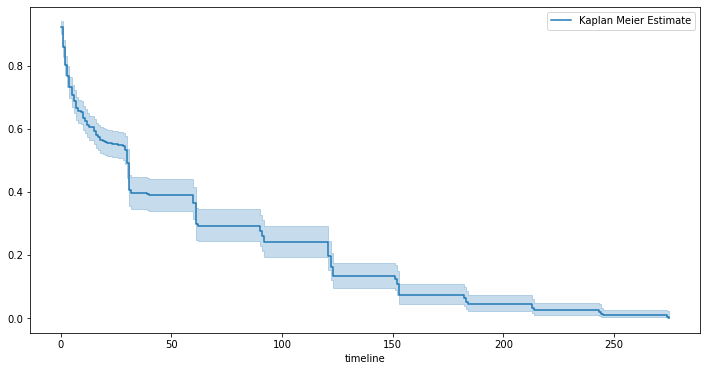

In [93]:
## Lets create an overall KaplanMeier curve, without breaking it into groups of covariates.

## Import the library
from lifelines import KaplanMeierFitter


durations = filtered['days'] ## Time to event data of censored and event data
event_observed = filtered['outcome']  ## It has the churned (1) and censored is (0)

## create a kmf object as km
km = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the data into the model
km.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
km.plot()

## Lets create Kaplan Meier Curves for Cohorts

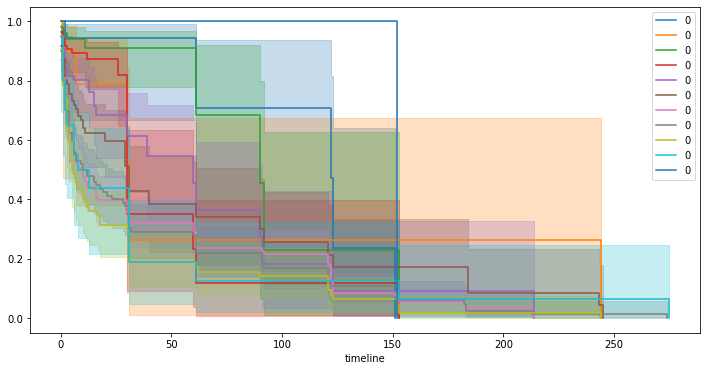

In [97]:
kmf = KaplanMeierFitter() 


T = filtered['days']     ## time to event
E = filtered['outcome']      ## event occurred or censored


groups = filtered['age_group']            ## Create the cohorts from the 'Contract' column
ix0 = (groups == 0)
ix1 = (groups == 1)   ## Cohort 1
ix2 = (groups == 2)         ## Cohort 2
ix3 = (groups == 3)         ## Cohort 3
ix4 = (groups == 4)
ix5 = (groups == 5)
ix6 = (groups == 6)
ix7 = (groups == 7)
ix8 = (groups == 8)
ix9 = (groups == 9)
ix10 = (groups == 10)



kmf.fit(T[ix0], E[ix0], label=0)    ## fit the cohort 1 data
ax = kmf.plot()
kmf.fit(T[ix1], E[ix1], label=0)    ## fit the cohort 1 data
ax1 = kmf.plot(ax=ax)
kmf.fit(T[ix2], E[ix2], label=0)    ## fit the cohort 1 data
ax2 = kmf.plot(ax=ax1)
kmf.fit(T[ix3], E[ix3], label=0)    ## fit the cohort 1 data
ax3 = kmf.plot(ax=ax2)
kmf.fit(T[ix4], E[ix4], label=0)    ## fit the cohort 1 data
ax4 = kmf.plot(ax=ax3)
kmf.fit(T[ix5], E[ix5], label=0)    ## fit the cohort 1 data
ax5 = kmf.plot(ax=ax4)
kmf.fit(T[ix6], E[ix6], label=0)    ## fit the cohort 1 data
ax6 = kmf.plot(ax=ax5)
kmf.fit(T[ix7], E[ix7], label=0)    ## fit the cohort 1 data
ax7 = kmf.plot(ax=ax6)
kmf.fit(T[ix8], E[ix8], label=0)    ## fit the cohort 1 data
ax8 = kmf.plot(ax=ax7)
kmf.fit(T[ix9], E[ix9], label=0)    ## fit the cohort 1 data
ax9 = kmf.plot(ax=ax8)
kmf.fit(T[ix10], E[ix10], label=0)    ## fit the cohort 1 data
ax10 = kmf.plot(ax=ax9)

## Cox Proportional Hazard Model (Survival Regression)

In [80]:
from lifelines import CoxPHFitter     

In [82]:
## My objective here is to introduce you to the implementation of the model.Thus taking subset of the columns to train the model.
## Only using the subset of the columns present in the original data
df_r= df.loc[:,['tenure','Churn','gender','Partner','Dependents','PhoneService','MonthlyCharges','SeniorCitizen','StreamingTV']]
df_r.head() ## have a look at the data 

,tenure,Churn,gender,Partner,Dependents,PhoneService,MonthlyCharges,SeniorCitizen,StreamingTV
0,1,0,Female,Yes,No,No,29.85,0,No
1,34,0,Male,No,No,Yes,56.95,0,No
2,2,1,Male,No,No,Yes,53.85,0,No
3,45,0,Male,No,No,No,42.30,0,No
4,2,1,Female,No,No,Yes,70.70,0,No


In [83]:
## Create dummy variables
df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()

,tenure,Churn,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,29.85,0,0,1,0,0,0,0
1,34,0,56.95,0,1,0,0,1,0,0
2,2,1,53.85,0,1,0,0,1,0,0
3,45,0,42.30,0,1,0,0,0,0,0
4,2,1,70.70,0,0,0,0,1,0,0


In [84]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_dummy, 'tenure', event_col='Churn')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 7043 observations, 5174 censored>
      duration col = tenure
         event col = Churn
number of subjects = 7043
  number of events = 1869
    log-likelihood = -15182.388
  time fit was run = 2019-01-06 06:00:01 UTC

---
                                   coef  exp(coef)  se(coef)        z      p  lower 0.95  upper 0.95     
MonthlyCharges                  -0.0109     0.9892    0.0018  -6.1274 0.0000     -0.0143     -0.0074  ***
SeniorCitizen                    0.3964     1.4864    0.0554   7.1581 0.0000      0.2878      0.5049  ***
gender_Male                     -0.0107     0.9894    0.0463  -0.2311 0.8173     -0.1015      0.0801     
Partner_Yes                     -0.8091     0.4452    0.0542 -14.9282 0.0000     -0.9154     -0.7029  ***
Dependents_Yes                  -0.3559     0.7006    0.0682  -5.2149 0.0000     -0.4896     -0.2221  ***
PhoneService_Yes                 0.6914     1.9964    0.1040   6.6472 0.0000      0.4875      0.8952  ***

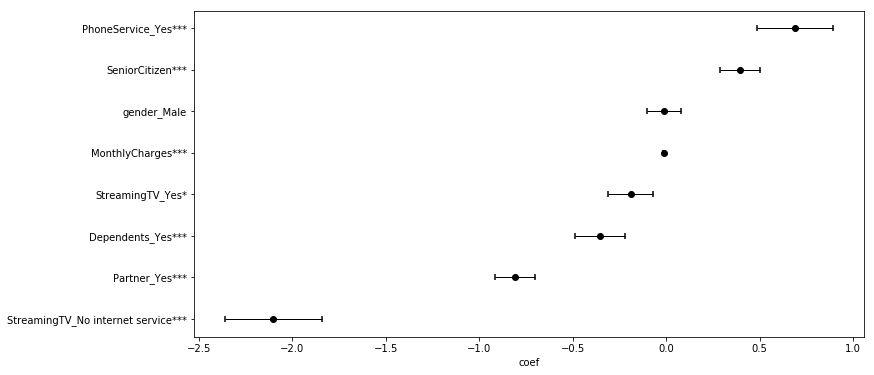

In [90]:
cph.plot()

In [85]:
## Check all the methods and attributes associated with the cph object.
dir(cph)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_values',
 '_compute_baseline_cumulative_hazard',
 '_compute_baseline_hazard',
 '_compute_baseline_hazards',
 '_compute_baseline_survival',
 '_compute_confidence_intervals',
 '_compute_delta_beta',
 '_compute_likelihood_ratio_test',
 '_compute_p_values',
 '_compute_residuals_within_strata',
 '_compute_sandwich_estimator',
 '_compute_standard_errors',
 '_compute_z_values',
 '_concordance_score_',
 '_get_efron_values',
 '_hessian_',
 '_log_likelihood',
 '_n_examples',
 '_newton_rhaphson',
 '_norm_mean',
 '_norm_std',
 '_score_',
 '_time_fit_was_called',
 '_train_log_partial_hazard',
 'alpha',
 'baseline_cumulative_ha

In [91]:
## We want to see the Survival curve at the customer level. Therefore, we have selected 6 customers (rows 5 till 9).

tr_rows = df_dummy.iloc[5:10, 2:]
tr_rows

,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
5,99.65,0,0,0,0,1,0,1
6,89.10,0,1,0,1,1,0,1
7,29.75,0,0,0,0,0,0,0
8,104.80,0,0,1,0,1,0,1
9,56.15,0,1,0,1,1,0,0


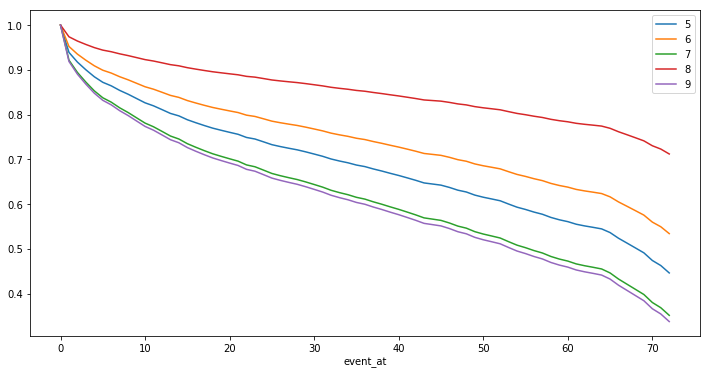

In [92]:
## Lets predict the survival curve for the selected customers. 
## Customers can be identified with the help of the number mentioned against each curve.
cph.predict_survival_function(tr_rows).plot()